### 1. **Edge Detection for Tumor Detection in Mammograms**

**Concept**:
Edge detection is a crucial feature extraction technique that helps in identifying boundaries of objects in images. In mammograms, tumors often have well-defined boundaries compared to surrounding tissues, making edge detection a suitable method for isolating potential tumor regions.

**Step-by-Step Process**:
1. **Preprocessing**:
   - Convert the mammogram to grayscale to simplify the image and reduce computational complexity.
   - Apply **Gaussian smoothing** to the image to reduce noise that could interfere with edge detection.

2. **Gradient Calculation**:
   - Apply a gradient-based edge detection method such as the **Sobel operator** to calculate the intensity gradient of the image.
   - This step identifies areas of rapid intensity change, which often corresponds to the edges of tumors.

3. **Edge Detection**:
   - Use a suitable edge detection algorithm like **Canny edge detection** or **Prewitt operator** to further isolate edges by applying thresholds to the gradient values.
   - The Canny method applies multiple steps including gradient computation, non-maximum suppression, and edge tracking by hysteresis to detect significant boundaries.

4. **Thresholding and Edge Linking**:
   - Set high and low threshold values for edge detection. Pixels above the high threshold are considered as definite edges, while those between high and low thresholds are considered weak edges, which might belong to tumor boundaries.

5. **Post-Processing**:
   - Perform **morphological operations** such as dilation and erosion to clean up the edges and emphasize the tumor boundary.

**Final Output**:
The result is a well-defined set of edges highlighting potential tumor regions in the mammogram.


### Additional Feature Extraction Technique:
- Texture Analysis: Texture features can provide valuable information about the internal structure of tissues, which can be indicative of tumors.

- Working Mechanism: Texture analysis involves quantifying the spatial arrangement of gray-level intensities within an image. Various techniques can be used, including:

   - Statistical Features: Mean, variance, standard deviation, skewness, kurtosis.
   - Structural Features: Gray-level co-occurrence matrices (GLCM), Haralick features, local binary patterns (LBP).
   - Wavelet Features: Decomposition of the image into different frequency bands to capture texture information at various scales.

- Suitability for Tumor Detection: Texture analysis is suitable for this task because:

   - Tumor Heterogeneity: Tumors often exhibit different texture patterns compared to normal tissues.
   - Complementary Information: Texture features can provide complementary information to edge-based features, improving overall detection accuracy.







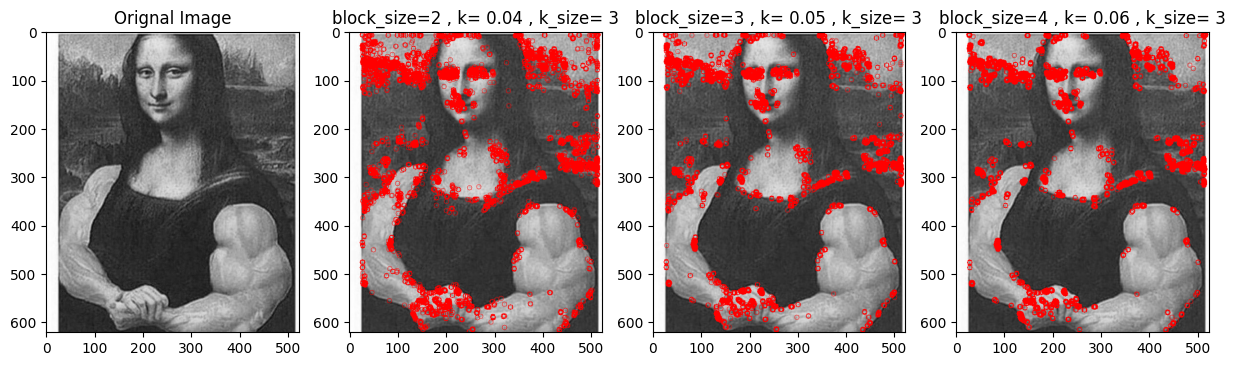

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread(r"C:\Users\Hp\Downloads\WhatsApp Image 2024-09-16 at 10.36.29_36cb5436.jpg" , cv2.IMREAD_GRAYSCALE)
def harris(block_size , k , k_size):
    
    corner_scores = cv2.cornerHarris(image , block_size , k_size ,k)
    threshold = 0.01 * corner_scores.max()
    corner = np.where(threshold < corner_scores)

    image_with_corners = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    for y, x in zip(*corner):
        cv2.circle(image_with_corners, (x, y), 5, (0, 0, 255), 1)

    image_with_corners_rgb = cv2.cvtColor(image_with_corners, cv2.COLOR_BGR2RGB)
    return image_with_corners_rgb

plt.figure(figsize=(15, 6))

plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Orignal Image')

plt.subplot(1, 4, 2)
plt.imshow(harris(block_size=2 , k= 0.04 , k_size= 3), cmap='gray')
plt.title('block_size=2 , k= 0.04 , k_size= 3')

plt.subplot(1, 4, 3)
plt.imshow(harris(block_size=3 , k= 0.05 , k_size= 3), cmap='gray')
plt.title('block_size=3 , k= 0.05 , k_size= 3')

plt.subplot(1, 4, 4)
plt.imshow(harris(block_size=4 , k= 0.06 , k_size= 3), cmap='gray')
plt.title('block_size=4 , k= 0.06 , k_size= 3')

plt.show()

In [4]:
import cv2
import numpy as np

frame_width = 640
frame_height = 360

video_path = r"C:\Users\Hp\Desktop\WhatsApp Video 2024-09-02 at 20.22.58_fa6b5700.mp4"
cap = cv2.VideoCapture(video_path)

def shi_tomasi(gray_frame , frame , maxCorners=100, qualityLevel=0.01, minDistance=10):
    corners = cv2.goodFeaturesToTrack(gray_frame, maxCorners , qualityLevel , minDistance )

    if corners is not None:
        # Convert corners to integer values
        corners = np.int0(corners)

        # Draw circles at the detected corners
        for corner in corners:
            x, y = corner.ravel()
            cv2.circle(frame, (x, y), 5, (0, 0, 255), -1)
    
    return frame

while cap.isOpened():
    ret, frame = cap.read()
    
    if not ret:
        print("End of video or error encountered.")
        break

    # Resize the frame
    frame = cv2.resize(frame, (frame_width, frame_height))

    # Convert the frame to grayscale for corner detection
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    f1 = shi_tomasi(gray_frame , frame , 100 , 0.01 , 10)
    f2 = shi_tomasi(gray_frame , frame , 200 , 0.02 , 20)
    f3 = shi_tomasi(gray_frame , frame , 300 , 0.03 , 30)

    top_row = np.hstack((frame, f1 ))
    bottom_row = np.hstack(( f2 , f3))
    combined_frame = np.vstack((top_row, bottom_row))
    # Display the frame with detected corners
    cv2.imshow('Video Processing Comparison', combined_frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


C:\Users\Hp\AppData\Local\Temp\ipykernel_2856\3973353170.py:15: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


End of video or error encountered.


C:\Users\Hp\AppData\Local\Temp\ipykernel_344\1753397136.py:21: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


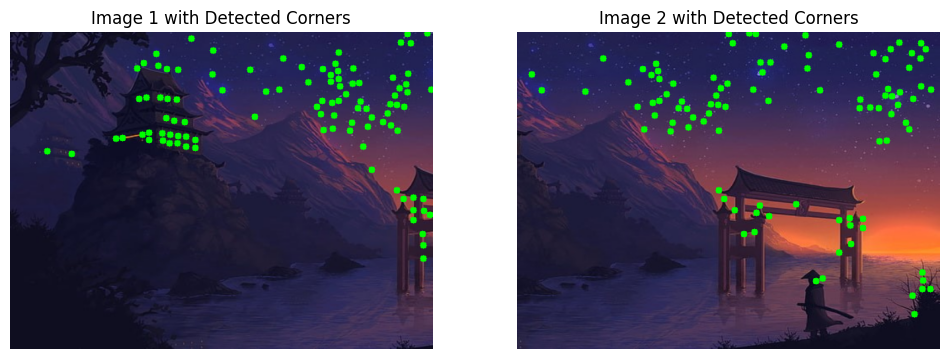

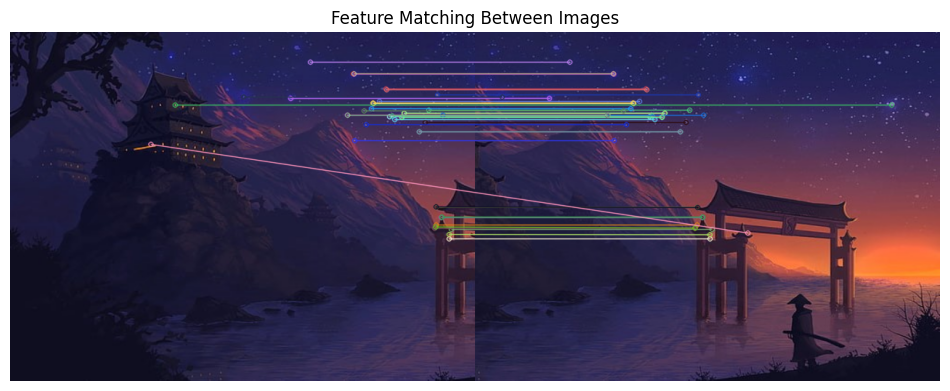

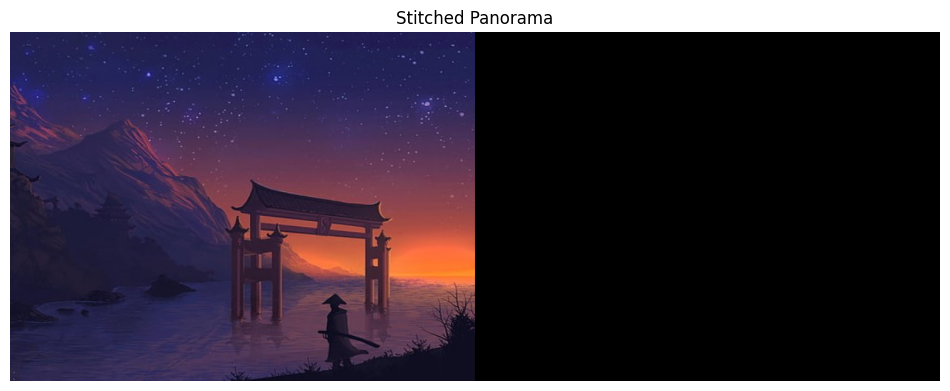

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images
image1 = cv2.imread(r"C:\Users\Hp\Pictures\1.jpg")
image2 = cv2.imread(r"C:\Users\Hp\Pictures\2.jpg")

# Resize the images for better visualization (optional)
image1 = cv2.resize(image1, (640, 480))
image2 = cv2.resize(image2, (640, 480))

def detect_and_draw_corners(image):
    # Convert the image to grayscale for corner detection
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Shi-Tomasi corner detection
    corners = cv2.goodFeaturesToTrack(gray_image, maxCorners=100, qualityLevel=0.01, minDistance=10)
    
    # Convert corners to integer values
    corners = np.int0(corners)
    
    # Draw circles at the detected corners
    for corner in corners:
        x, y = corner.ravel()
        cv2.circle(image, (x, y), 5, (0, 255, 0), -1)
    
    return image

# Detect and draw corners for both images
image1_with_corners = detect_and_draw_corners(image1.copy())
image2_with_corners = detect_and_draw_corners(image2.copy())

# Display the images with detected corners
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image1_with_corners, cv2.COLOR_BGR2RGB))
plt.title('Image 1 with Detected Corners')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image2_with_corners, cv2.COLOR_BGR2RGB))
plt.title('Image 2 with Detected Corners')
plt.axis('off')

plt.show()

# took help from GPT 
orb = cv2.ORB_create()

# Detect ORB keypoints and descriptors
keypoints1, descriptors1 = orb.detectAndCompute(cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY), None)
keypoints2, descriptors2 = orb.detectAndCompute(cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY), None)

# Brute-Force matcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)
matches = sorted(matches, key=lambda x: x.distance)

# Draw the matches between the two images
matched_image = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display matched image
plt.figure(figsize=(12, 6))
plt.imshow(cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB))
plt.title('Feature Matching Between Images')
plt.axis('off')
plt.show()

# Stitching the images using homography
if len(matches) > 10:
    # Get the matching keypoints
    src_pts = np.float32([keypoints1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

    # Compute homography
    H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    # Use homography to warp image1 to align with image2
    height, width, _ = image2.shape
    stitched_image = cv2.warpPerspective(image1, H, (width + image1.shape[1], height))

    # Place image2 on the stitched image
    stitched_image[0:image2.shape[0], 0:image2.shape[1]] = image2

    # Display stitched panorama
    plt.figure(figsize=(12, 6))
    plt.imshow(cv2.cvtColor(stitched_image, cv2.COLOR_BGR2RGB))
    plt.title('Stitched Panorama')
    plt.axis('off')
    plt.show()
else:
    print("Not enough matches found for stitching.")


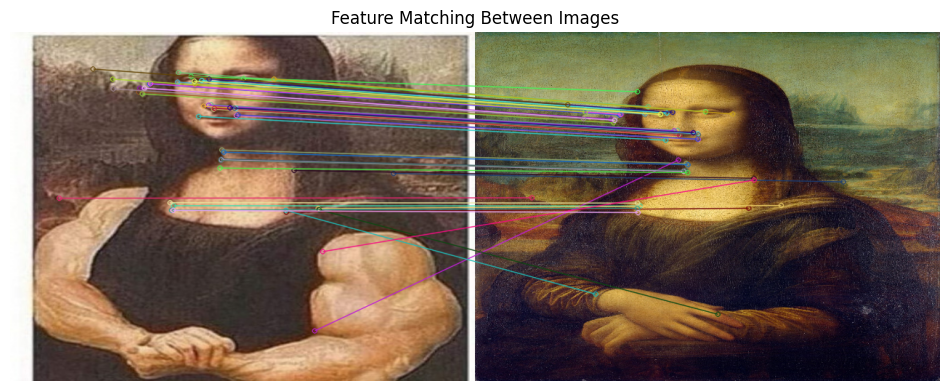

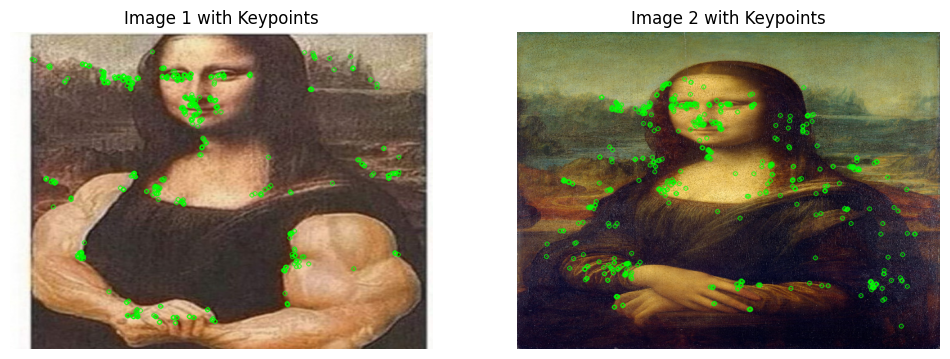

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load two images with common features
image1 = cv2.imread(r"C:\Users\Hp\Downloads\WhatsApp Image 2024-09-16 at 10.36.29_36cb5436.jpg")
image2 = cv2.imread(r"C:\Users\Hp\Desktop\mona.jpeg")


# Resize images for better visualization (optional)
image1 = cv2.resize(image1, (640, 480))
image2 = cv2.resize(image2, (640, 480))

# Convert images to grayscale (ORB works on grayscale images)
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Create ORB detector and descriptor
orb = cv2.ORB_create()

# Detect keypoints and compute descriptors in both images
keypoints1, descriptors1 = orb.detectAndCompute(gray1, None)
keypoints2, descriptors2 = orb.detectAndCompute(gray2, None)

# Brute-Force Matcher with Hamming distance (since ORB uses binary descriptors)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors between the two images
matches = bf.match(descriptors1, descriptors2)

# Sort matches by distance (best matches first)
matches = sorted(matches, key=lambda x: x.distance)

# Draw top 50 matches
matched_image = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matches
plt.figure(figsize=(12, 6))
plt.imshow(cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB))
plt.title('Feature Matching Between Images')
plt.axis('off')
plt.show()

# Display the keypoints on the original images
image1_with_keypoints = cv2.drawKeypoints(image1, keypoints1, None, color=(0, 255, 0), flags=0)
image2_with_keypoints = cv2.drawKeypoints(image2, keypoints2, None, color=(0, 255, 0), flags=0)

# Display the images with detected keypoints
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image1_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('Image 1 with Keypoints')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image2_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('Image 2 with Keypoints')
plt.axis('off')

plt.show()

# Experiment with different image transformations (e.g., rotation, scaling) and repeat the process.
